### Importing Dependencies

In [78]:
#Importing all the dependencies for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [98]:
#Reading the tennis csv file into dataframe using pandas
train_df = pd.read_csv("tennis.csv")
train = train_df.copy()

In [99]:
#Trying to look into the columns details for top 5 items
train_df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [100]:
#Information regarding total entries for each columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
day         14 non-null object
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
wind        14 non-null object
play        14 non-null object
dtypes: object(6)
memory usage: 800.0+ bytes


In [101]:
train_df.describe()

,day,outlook,temp,humidity,wind,play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D4,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


In [102]:
#let us look at the unique values of all columns
train_df['day'].unique()

array(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
       'D12', 'D13', 'D14'], dtype=object)

In [103]:
train_df['outlook'].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [104]:
train_df['temp'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [105]:
train_df['humidity'].unique()

array(['High', 'Normal'], dtype=object)

### Feature Engineering ---> Label encoder

In [106]:
#Use Feature enginnering methond --> Label encoding
for label in train_df.columns:
    train_df[label] = LabelEncoder().fit(train_df[label]).transform(train_df[label])

In [107]:
train_df.head()

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1


In [108]:
data =train_df.copy()

In [109]:
data = data.drop(['day'],axis='columns')
data.head(5)

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [110]:
#Just to cross check all the column names after encoding
data.columns

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [111]:
#We have cleaned up all the categorical data into numeric data which is good for the model.

### Visualization of the Tennis Data Set

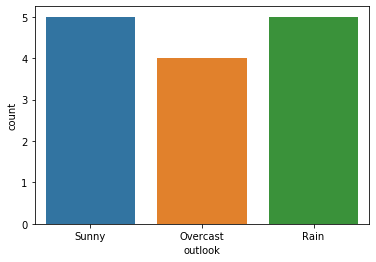

In [112]:
#Lets visualize the count of data for individual columns and how are they distributed
ax = sns.countplot(x="outlook", data=train)

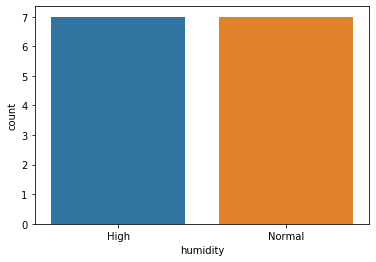

In [113]:
ay = sns.countplot(x="humidity", data=train)

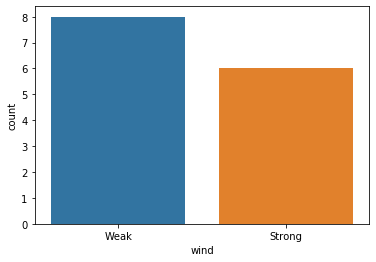

In [114]:
az = sns.countplot(x="wind", data=train)

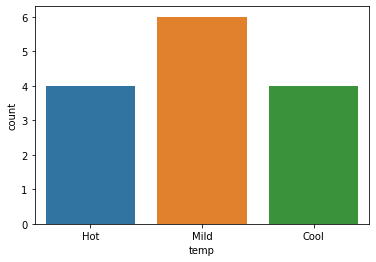

In [115]:
aq = sns.countplot(x="temp", data=train)

Text(0.5, 0.98, 'Wind count')

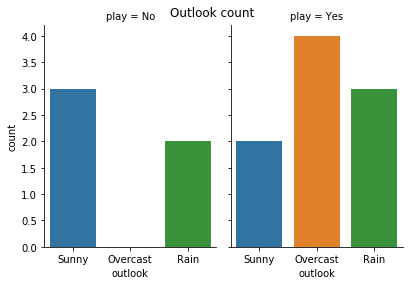

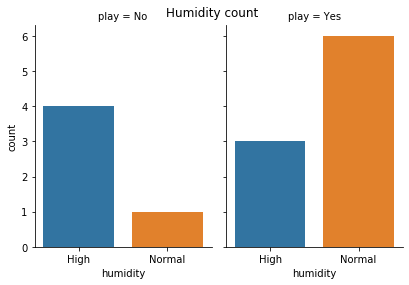

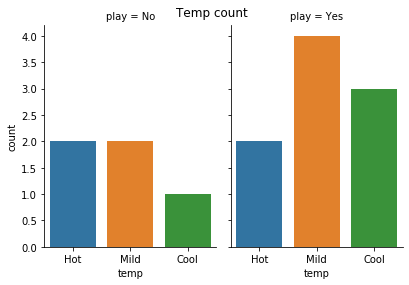

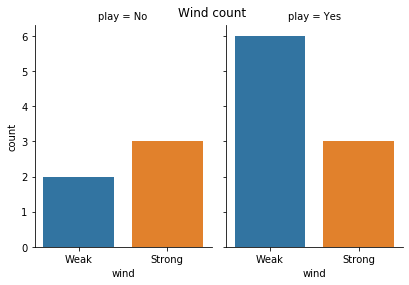

In [116]:
#Visualizing the outcome w.r.t to each of the columns
g = sns.catplot(x="outlook", col="play",data=train, kind="count",height=4, aspect=.7);
g.fig.suptitle('Outlook count')

f = sns.catplot(x="humidity", col="play",data=train, kind="count",height=4, aspect=.7);
plt.suptitle("Humidity count")

h = sns.catplot(x="temp", col="play",data=train, kind="count",height=4, aspect=.7);
plt.suptitle("Temp count")

i = sns.catplot(x="wind", col="play",data=train, kind="count",height=4, aspect=.7);
plt.suptitle("Wind count")

## Building a Model for Predicting

In [117]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function to split the data into test and train data set
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [118]:
feature_cols = ['outlook','temp','humidity','wind']
X = data.drop(['play'],axis='columns') #Features
y = data['play']       # Target variable

In [119]:
X  # To check the feature columns 

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [120]:
y #To check the output columns

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [121]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Using Cart Decision Tree

In [122]:
clf = DecisionTreeClassifier() #Default criterion is 'Gini' and spitter is 'best'

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [123]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


### Using ID3 Decision Tree

In [124]:
# Lets us train the data using 'Entropy criterion'
clf_new = DecisionTreeClassifier(criterion='entropy') 

# Train Decision Tree Classifer
clf_new = clf_new.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_new = clf_new.predict(X_test)

### Accuracy of the train data set for the Decision Tree Model

In [125]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_new))

Accuracy: 0.6666666666666666


In [126]:
# We saw that there was no change in the accuracy after using both the criterion.

### Cross Validation Method to validate the model

In [127]:
from sklearn.model_selection import cross_val_score
from statistics import mean

scores = cross_val_score(clf_new, X, y, cv = 3, scoring ='accuracy') 
avg_cross_val_score = mean(scores)*100
print(scores)
print('Accuracy for ID3 Decision Tree is:',avg_cross_val_score)

[0.8 0.6 1. ]
Accuracy for ID3 Decision Tree is: 80.0


In [128]:
scores = cross_val_score(clf, X, y, cv = 3, scoring ='accuracy') 
avg_cross_val_score = mean(scores)*100
print(scores)
print('Accuracy for Cart Decision Tree is:',avg_cross_val_score)

[0.6 0.6 1. ]
Accuracy for Cart Decision Tree is: 73.33333333333333


### Using LOOCV Method on Cart Decision Tree 

In [129]:
print(cross_val_score(clf, X, y, cv=3, scoring ='accuracy').mean())

0.8666666666666667


### Using LOOCV Method on ID3 Decision Tree

In [130]:
print(cross_val_score(clf_new, X, y, cv=3, scoring ='accuracy').mean())

0.7999999999999999


### Predicting the outcome of the test data set

In [131]:
#In order to predict the test data set, we need to do the same EDA as we did to the train data set.

In [132]:
#First we will import the test dataset.
test_df = pd.read_csv("test.csv")
test_df.head()

,D15,Overcast,Cool,Normal,Strong
0,D16,Sunny,Mild,High,Weak
1,D17,Sunny,Cool,Normal,Weak
2,D18,Sunny,Hot,High,Weak
3,D19,Sunny,Mild,High,Weak


In [134]:
test_df = pd.read_csv("test.csv", header =None, names = ['day','outlook','temp','humidity','wind'])

In [135]:
test_df.head()

,day,outlook,temp,humidity,wind
0,D15,Overcast,Cool,Normal,Strong
1,D16,Sunny,Mild,High,Weak
2,D17,Sunny,Cool,Normal,Weak
3,D18,Sunny,Hot,High,Weak
4,D19,Sunny,Mild,High,Weak


In [136]:
#Now we have the data set with the proper headings

In [137]:
#Use Feature enginnering methond --> Label encoding
for label in test_df.columns:
    test_df[label] = LabelEncoder().fit(test_df[label]).transform(test_df[label])

In [138]:
test_df.head()

,day,outlook,temp,humidity,wind
0,0,0,0,1,0
1,1,1,2,0,1
2,2,1,0,1,1
3,3,1,1,0,1
4,4,1,2,0,1


In [139]:
#Now let us drop the day column
data_test = test_df.drop(['day'],axis='columns')
data_test.head(5)

,outlook,temp,humidity,wind
0,0,0,1,0
1,1,2,0,1
2,1,0,1,1
3,1,1,0,1
4,1,2,0,1


In [140]:
# Now we will fit the model to the data
clf_new_test = DecisionTreeClassifier(criterion='entropy') 

# Train Decision Tree Classifer
clf_new_test.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_test = clf_new_test.predict(data_test)

In [141]:
print(y_pred_test)

[1 0 1 0 0]


In [142]:
play_df = pd.DataFrame({'play':y_pred_test})

In [143]:
df = pd.concat([test_df,play_df],axis='columns')

In [144]:
df

,day,outlook,temp,humidity,wind,play
0,0,0,0,1,0,1
1,1,1,2,0,1,0
2,2,1,0,1,1,1
3,3,1,1,0,1,0
4,4,1,2,0,1,0


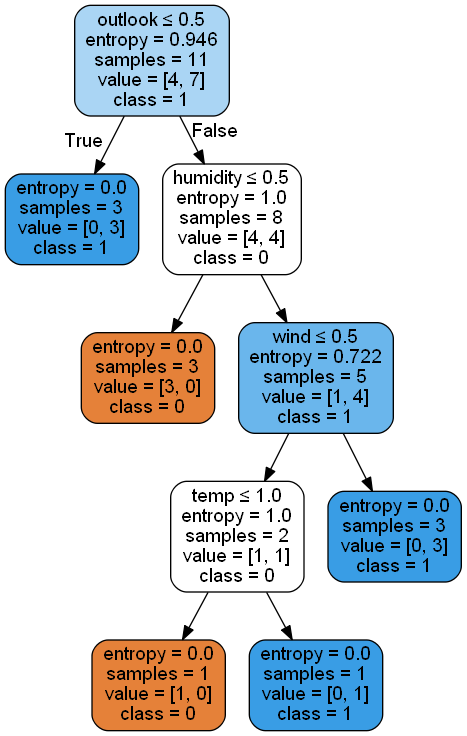

In [145]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_new_test, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('id3Tree.png')
Image(graph.create_png())

In [146]:
from sklearn.metrics import roc_curve

y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

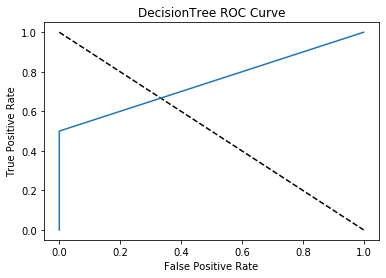

In [147]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='DecisionTree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTree ROC Curve')
plt.show()